In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data

,carat,cut,color,clarity,depth,table,price,x,y,z,label5
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3


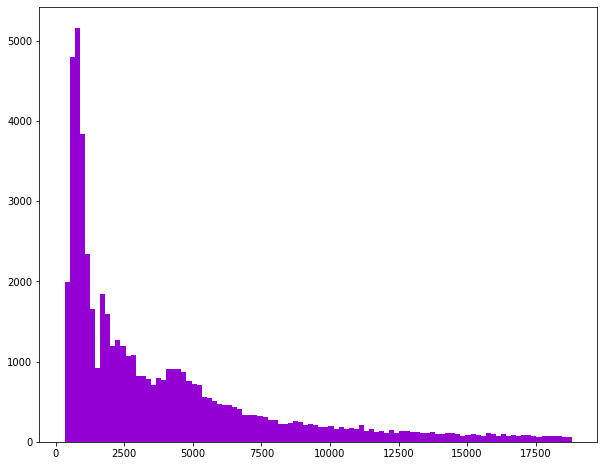

In [3]:
plt.figure(figsize=(10, 8))
plt.hist(data['price'], bins = 100, color = 'darkviolet')
plt.show()

In [4]:
def bootstap(data):
    samples = np.random.choice(data, size = (len(data), 5000))
    mean_samp = np.mean(samples, axis = 0)
    
    std_s = np.std(mean_samp)
    mean_s = np.mean(mean_samp)
    
    #pivotal
    lb = mean_s - 1.96 * std_s
    rb = mean_s + 1.96 * std_s
    
    #non-pivotal
    smr = sorted(mean_samp)
    lbn = smr[125]
    rbn = smr[4875]
    
    return mean_samp, lb, rb, lbn, rbn

3898.899386954138
3966.461165096289
3898.1517797552838
3965.740693362996


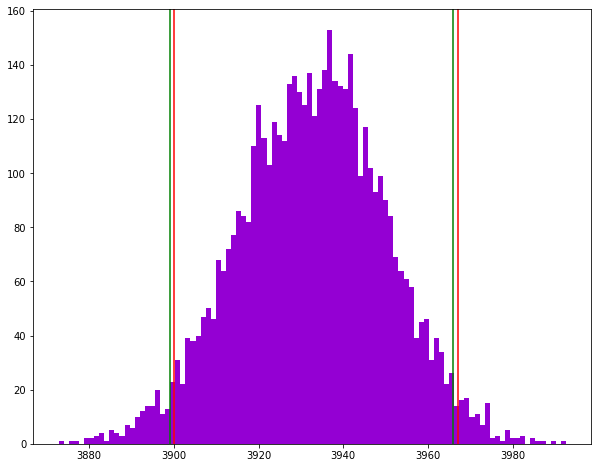

In [5]:
mean_samp, lb, rb, lbn, rbn = bootstap(data['price'])
print(lb)
print(rb)
print(lbn)
print(rbn)
plt.figure(figsize=(10, 8))
plt.hist(mean_samp, bins = 100, color = 'darkviolet', ) 

plt.axvline(3899, c='g')
plt.axvline(3966, c='g')
plt.axvline(3900, c='r')
plt.axvline(3967, c='r')
plt.show()

4601.864696629494 4703.735051280685 4602.170299950828 4703.759875430257


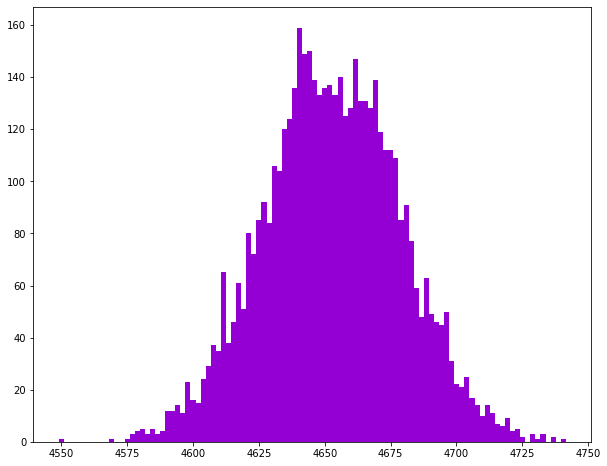

In [6]:
mean_samp_1, lb, rb, lbn, rbn = bootstap(data[data['label5'] == 1]['price'])
print(lb, rb, lbn, rbn)
plt.figure(figsize=(10, 8))
plt.hist(mean_samp_1, bins = 100, color = 'darkviolet') 
plt.show()

4585.276794778486 4646.7634017779355 4585.212560386473 4647.073206986251


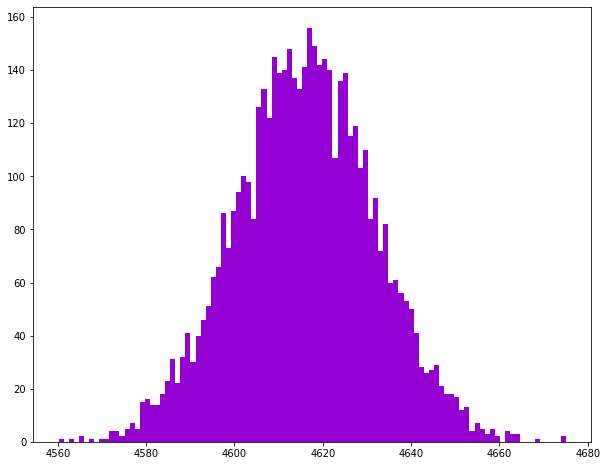

In [7]:
mean_samp_3, lb, rb, lbn, rbn = bootstap(data[data['label5'] == 3]['price'])
print(lb, rb, lbn, rbn)
plt.figure(figsize=(10, 8))
plt.hist(mean_samp_3, bins = 100, color = 'darkviolet') 
plt.show()

35.931096528925224 37.61364710746052 35.92235210494722 37.61791846292825


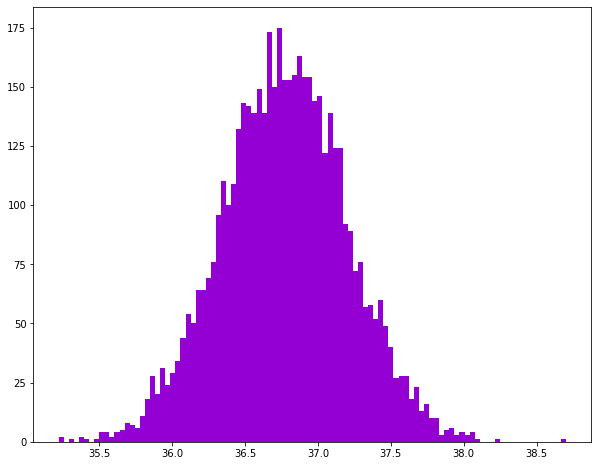

In [8]:
mean_diff, lb, rb, lbn, rbn = bootstap(mean_samp_1 - mean_samp_3)
print(lb, rb, lbn, rbn)
plt.figure(figsize=(10, 8))
plt.hist(mean_diff, bins = 100, color = 'darkviolet') 
plt.show()

In [9]:
std_s = np.std(mean_samp_1 - mean_samp_3)
mean_s = np.mean(mean_samp_1 - mean_samp_3)
    
    #pivotal
# smb = np.std(mean_samp_1 - mean_samp_3)
lb = mean_s - 1.96 * std_s
rb = mean_s + 1.96 * std_s
    
    #non-pivotal
smr = sorted(mean_samp_1 - mean_samp_3)
lbn = smr[126]
rbn = smr[4875]

lb, rb, lbn, rbn

(-23.322650906348684, 96.88220226010469, -22.364945046504545, 96.3884339454271)

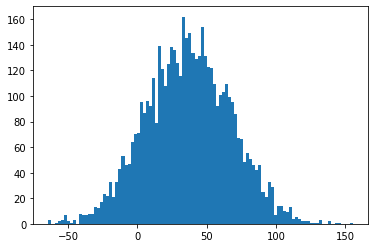

In [10]:
plt.hist(mean_samp_1 - mean_samp_3, bins=100);

In [11]:
mean_samp_2, lb, rb, lbn, rbn = bootstap(data[data['label5'] == 2]['price'])

In [12]:
std_s = np.std(mean_samp_2 - mean_samp_3)
mean_s = np.mean(mean_samp_2 - mean_samp_3)
    
    #pivotal
smb = np.std(mean_samp_2 - mean_samp_3)
lb = mean_s - 1.96 * std_s
rb = mean_s + 1.96 * std_s
    
    #non-pivotal
smr = sorted(mean_samp_2 - mean_samp_3)
lbn = smr[126]
rbn = smr[4875]

lb, rb, lbn, rbn

(-3609.7036816463083,
 -3542.5709376650725,
 -3609.5356799360047,
 -3541.95203414752)

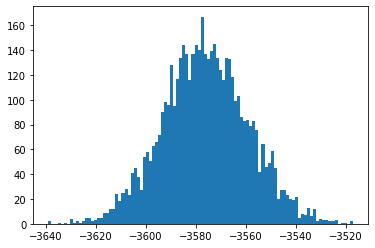

In [13]:
plt.hist(mean_samp_2 - mean_samp_3, bins=100);

In [14]:
std_s = np.std(mean_samp_1 - mean_samp)
mean_s = np.mean(mean_samp_1 - mean_samp)
    
    #pivotal
smb = np.std(mean_samp_1 - mean_samp)
lb = mean_s - 1.96 * std_s
rb = mean_s + 1.96 * std_s
    
    #non-pivotal
smr = sorted(mean_samp_1 - mean_samp)
lbn = smr[126]
rbn = smr[4875]

lb, rb, lbn, rbn

(659.6373298573192, 780.6018660024331, 660.0078049775998, 780.1899729598113)

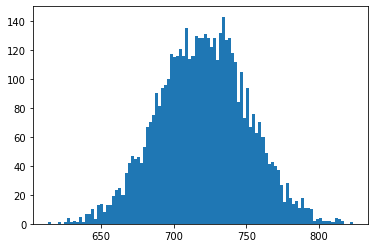

In [15]:
plt.hist(mean_samp_1 - mean_samp, bins=100);